Antonio Fernandes Valadares - 11711ECP015 \
Computação Evolutiva \
Universidade Federal de Uberlândia - Engenharia de computação \
Professor: Keiji Yamanaka

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

Maximizar a seguinte função:

f(x,y) = 10 + x sen(4x) + 3 sen(2y)

In [16]:
def f(x,y):
  return 10 + x * np.sin(4*x) + 3 * np.sin(2*y)

Podemos plotar o gráfico para visualização:

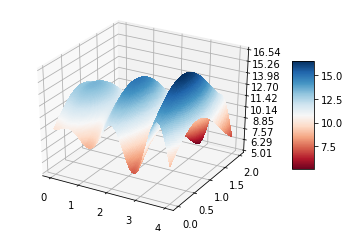

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from pylab import meshgrid


x = np.arange(0.0, 4.0, 0.01)
y = np.arange(0.0, 2.0, 0.01)
X,Y = meshgrid(x,y)
Z = f(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Funções

Função que cria uma população inicial aleatório

In [18]:
def initial_population(size=50):
  d = {'x':np.random.random(size = (size)) *4, 'y':np.random.random(size = (size)) *2}

  population = pd.DataFrame(data=d, columns=['x', 'y'])

  population['bin_x'] = population['x']*256

  population['bin_x'] = population['bin_x'].astype(int)

  population['bin_y'] = population['y']*256

  population['bin_y'] = population['bin_y'].astype(int)

  population['bin_y'] = population['bin_y'].apply(lambda x: '{0:09b}'.format(x))

  population['bin_x'] = population['bin_x'].apply(lambda x: '{0:010b}'.format(x))
  
  return population

initial_population(size=10)


,x,y,bin_x,bin_y
0,2.074964,1.011503,1000010011,100000010
1,3.639934,1.773431,1110100011,111000101
2,1.122600,0.380575,0100011111,001100001
3,0.234395,1.085483,0000111100,100010101
4,1.599878,0.464450,0110011001,001110110
5,3.274896,0.521023,1101000110,010000101
6,2.545535,0.562908,1010001011,010010000
7,3.759221,1.617687,1111000010,110011110
8,2.519332,1.757297,1010000100,111000001
9,0.719025,1.807729,0010111000,111001110


Calcula o fitness de todos indíviduos:

In [19]:
def fitness(population, verbose=False):
  population['fitness'] = f(population['x'], population['y'])

  population.sort_values(by='fitness', inplace=True, ascending=False)

  if verbose:
    print('Melhor resultado: \n', population.head(1).to_string(index=False))

  return population


fitness(initial_population(size=10), verbose=True)

Melhor resultado: 
         x        y       bin_x      bin_y    fitness
 3.804351  0.87395  1111001101  011011111  14.745381


,x,y,bin_x,bin_y,fitness
5,3.804351,0.873950,1111001101,011011111,14.745381
9,3.829152,0.569450,1111010100,010010001,14.185120
8,0.633732,0.735135,0010100010,010111100,13.346164
3,2.343437,0.613411,1001010111,010011101,12.943796
1,3.032030,1.083593,1100001000,100010101,11.195450
7,3.128463,0.127824,1100100000,000100000,10.594396
2,0.250374,0.047404,0001000000,000001100,10.494882
6,1.537232,1.468090,0110001001,101110111,10.406147
4,3.840615,1.875700,1111010111,111100000,9.582573
0,2.997678,1.516403,1011111111,110000100,8.693817


Funções que realizam o processo de crossover usando elitismo e torneio.

In [20]:
def torneio(population, k, size):
  torneio = pd.DataFrame().reindex_like(population).dropna()

  p = np.random.choice(np.arange(0,size), size=k)

  for element in p:
        torneio = torneio.append(population.iloc[element])

  torneio.sort_values(by='fitness', inplace=True, ascending=False)

  return torneio.iloc[0]


def crossover(population, crossover_rate=1, size=50, k=3):
  
  new_population = pd.DataFrame().reindex_like(population).dropna()

  #ELITISMO
  new_population = new_population.append(population.iloc[0])

  while(new_population.shape[0] < size):

    #pai 1 
    p1 = torneio(population, k, size)

    #pai 2
    p2 = torneio(population, k, size)

    if(np.random.random() <= crossover_rate):
      c1_x = p1['bin_x']
      c2_x = p2['bin_x']

      c1_y = p1['bin_y']
      c2_y = p2['bin_y']

      i = random.randint(0,10)

      f1_x = c1_x[0:i] + c2_x[i:10]
      f2_x = c2_x[0:i] + c1_x[i:10]

      i = random.randint(0,9)

      f1_y = c1_y[0:i] + c2_y[i:9]
      f2_y = c2_y[0:i] + c1_y[i:9]

      f1 = pd.Series({'x': int(f1_x, 2)/256, 'y': int(f1_y, 2)/256, 'bin_x': f1_x, 'bin_y': f1_y, 'fitness': 0})
      f2 = pd.Series({'x': int(f2_x, 2)/256, 'y': int(f2_y, 2)/256, 'bin_x': f2_x, 'bin_y': f2_y, 'fitness': 0})

      new_population = new_population.append(f1, ignore_index=True)
      new_population = new_population.append(f2, ignore_index=True)

    else:
      new_population = new_population.append(p1)
      new_population = new_population.append(p2)

  
  new_population = new_population[:-1]
  new_population.reset_index()

  return new_population

crossover(fitness(initial_population(size=10)), size=10, crossover_rate=0.6, k=3)

,x,y,bin_x,bin_y,fitness
0,1.957651,0.837801,0111110101,011010110,14.940655
1,2.437500,1.414062,1001110000,101101010,0.000000
2,1.574219,0.847656,0110010011,011011001,0.000000
3,1.312500,0.523438,0101010000,010000110,0.000000
4,2.957031,1.835938,1011110101,111010110,0.000000
5,1.957031,0.835938,0111110101,011010110,0.000000
6,1.957031,0.835938,0111110101,011010110,0.000000
7,0.485541,0.742799,0001111100,010111110,13.441561
8,0.485541,0.742799,0001111100,010111110,13.441561
9,0.488281,0.722656,0001111101,010111001,0.000000


Função responsável pela mutação da população

In [21]:
def mut(x, mutation_rate, t):

  if (np.random.random() < mutation_rate):
    x = list(x)
    pos = random.randint(0,t-1)
    if(x[pos] == '1'):
      x[pos] = '0'
    else:
      x[pos] = '1'

  return ''.join(x)

def mutation(population, mutation_rate):

  population['bin_x'] = population['bin_x'].apply(lambda x: mut(x, mutation_rate, 10))
  population['bin_y'] = population['bin_y'].apply(lambda x: mut(x, mutation_rate, 9))

  return population

mutation(initial_population(size=10), mutation_rate=0.5)

,x,y,bin_x,bin_y
0,1.734815,1.367414,0110111100,101011110
1,3.581747,1.452704,1110010100,111110011
2,0.697812,0.112620,0010110000,000011100
3,0.284413,1.640225,0001001000,110100011
4,1.531147,0.889398,0110000011,011100011
5,0.151986,0.631323,1000100110,010101001
6,3.789436,1.011729,1111001010,100000011
7,2.535132,0.364737,1010001000,001011101
8,0.875465,0.819344,0010100000,011010001
9,3.961900,1.394608,1110110110,111100101


In [22]:
def genetic_algorithm(size=20, crossover_rate=0.6, k=3, geracoes=100, mutation_rate=0.1, verbose=False):

  resultado = []
  resultado_media = []
  population = initial_population(size=size)

  i = 0
  while(i<geracoes):
    
    if verbose:
      print('\nGeração: ', i + 1)

    population = fitness(population, verbose)
    resultado.append(np.max(population['fitness']))
    resultado_media.append(population['fitness'].mean())

    if verbose:
      print('Média de aptidão: ', population['fitness'].mean())

    population = crossover(population, size=size, crossover_rate=crossover_rate, k=k)
    population = mutation(population, mutation_rate=mutation_rate)
    
    
    
    i = i + 1

  print('\n Resultado final !!!! \n ')
  population = fitness(population, verbose=True)
  print('\nMédia de aptidão: ', population['fitness'].mean())


  return population, resultado, resultado_media

# Testes:

In [23]:
population, resultado, resultado_media = genetic_algorithm(size=20, crossover_rate=0.6, k=3, geracoes=20, mutation_rate=0.1, verbose=True)


Geração:  1
Melhor resultado: 
         x         y       bin_x      bin_y    fitness
 3.628008  0.795095  1110100000  011001011  16.375506
Média de aptidão:  11.418819641223807

Geração:  2
Melhor resultado: 
         x         y       bin_x      bin_y    fitness
 3.628008  0.795095  1110100001  011001011  16.375506
Média de aptidão:  13.260891447746337

Geração:  3
Melhor resultado: 
         x         y       bin_x      bin_y    fitness
 3.628008  0.795095  1110100001  011001011  16.375506
Média de aptidão:  14.308332028000004

Geração:  4
Melhor resultado: 
      x         y       bin_x      bin_y    fitness
 3.625  0.789062  1110100000  011001010  16.388914
Média de aptidão:  15.01485832247624

Geração:  5
Melhor resultado: 
      x         y       bin_x      bin_y    fitness
 3.625  0.789062  1110100000  011001010  16.388914
Média de aptidão:  16.31054706189379

Geração:  6
Melhor resultado: 
      x         y       bin_x      bin_y    fitness
 3.625  0.789062  1110100000  01100

Melhor resultado encontrado: 16.54306, x=3.550781 y=0.785156. \
Geração 162, codigo binário: 1000000110  010001101 \
(size=50, crossover_rate=0.6, k=3, geracoes=1000, mutation_rate=0.1)


In [24]:
f(3.550781, 0.785156)

16.543059906767787

# Resultados

In [ ]:
resultado, resultado_media

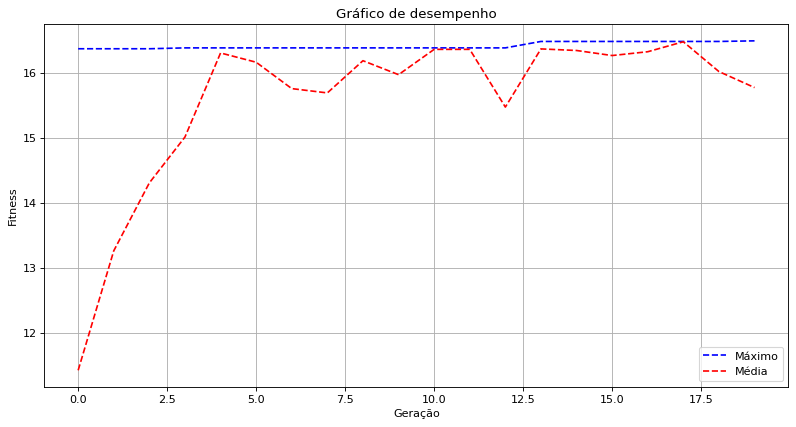

In [26]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)

#plt.plot( resultado, 'bo' );
plt.plot( resultado[0:30] , 'k--', color='blue', label='Máximo' );

#plt.plot( resultado_media, 'ro' );
plt.plot( resultado_media[0:30], 'k--', color='red', label='Média' );

plt.grid(True)
plt.legend(['Máximo','Média'])
plt.xlabel("Geração")
plt.ylabel("Fitness")
plt.title("Gráfico de desempenho")

plt.show()

In [27]:
import seaborn as sns

In [33]:
resultados = []
resultados_media = []

for i in range(30):
  population, resultado, resultado_media = genetic_algorithm(size=20, crossover_rate=0.6, k=3, geracoes=20, mutation_rate=0.1)
  resultados.append(resultado[-1])
  resultados_media.append(resultado_media[-1])



 Resultado final !!!! 
 
Melhor resultado: 
         x         y       bin_x      bin_y    fitness
 3.539062  0.730469  1110001010  010111011  16.520333

Média de aptidão:  16.203270717089865

 Resultado final !!!! 
 
Melhor resultado: 
         x         y       bin_x      bin_y    fitness
 1.996094  0.785156  0101111111  011001001  14.979148

Média de aptidão:  14.568062850768063

 Resultado final !!!! 
 
Melhor resultado: 
         x         y       bin_x      bin_y    fitness
 3.488281  0.945312  1101111101  011110010  16.277239

Média de aptidão:  15.938937194344856

 Resultado final !!!! 
 
Melhor resultado: 
         x         y       bin_x      bin_y    fitness
 3.566406  0.765625  1110010001  011000100  16.534676

Média de aptidão:  16.218061789634547

 Resultado final !!!! 
 
Melhor resultado: 
         x         y       bin_x      bin_y    fitness
 3.554688  0.785156  1110001010  011001001  16.542864

Média de aptidão:  15.621632495183315

 Resultado final !!!! 
 
Melhor re

Melhor individuo das gerações: \
genetic_algorithm(size=20, crossover_rate=0.6, k=3, geracoes=10, mutation_rate=0.1)


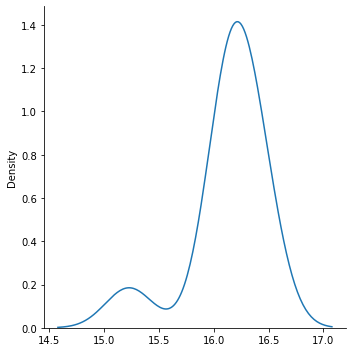

In [29]:
sns.displot(resultado, kind='kde');

Media de fitness dos individuos das gerações: \
genetic_algorithm(size=20, crossover_rate=0.6, k=3, geracoes=10, mutation_rate=0.1)


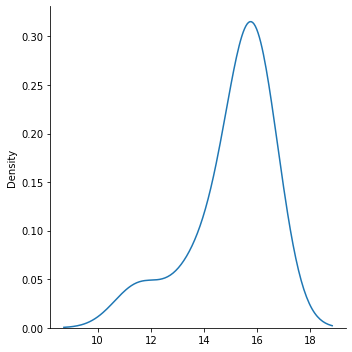

In [30]:
sns.displot(resultado_media, kind='kde');

Resultados de 30 execuções: \
genetic_algorithm(size=20, crossover_rate=0.6, k=3, geracoes=10, mutation_rate=0.1)


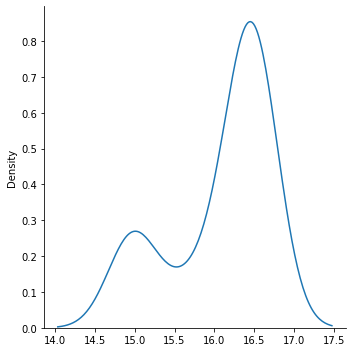

In [34]:
sns.displot(resultados, kind='kde');

Resultados da média de fitness de 30 execuções: \
genetic_algorithm(size=20, crossover_rate=0.6, k=3, geracoes=10, mutation_rate=0.1)


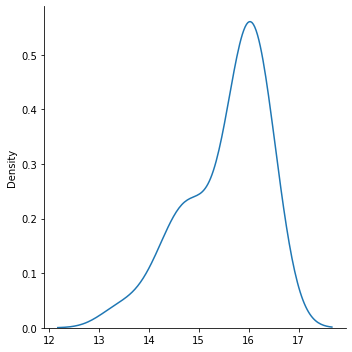

In [32]:
sns.displot(resultados_media, kind='kde');